In [1]:
import json
import numpy as np
from shapely.geometry import shape, Point, GeometryCollection, box, Polygon
from polygon_filler import (PolygonFiller, PolygonFillerStrict, PolygonFillerBeeInitialization, PolygonFillerBeeStrict,
                            IrregularPacker, IrregularPackerStrict)

# Rectangular Container - Circular items

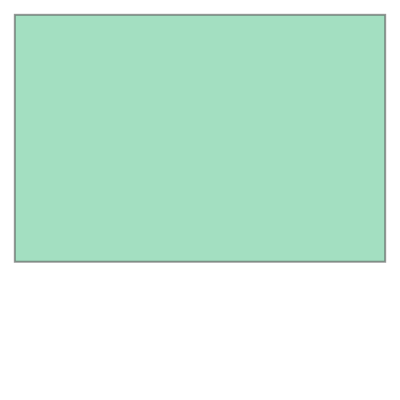

In [10]:
container = box(-2, -2, 4, 2)
container

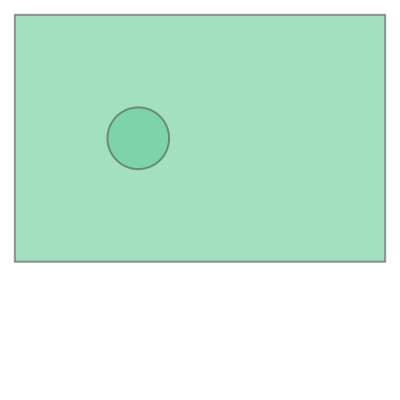

In [3]:
radius = 0.5
circle = Point([0, 0]).buffer(radius)
GeometryCollection([container, circle])

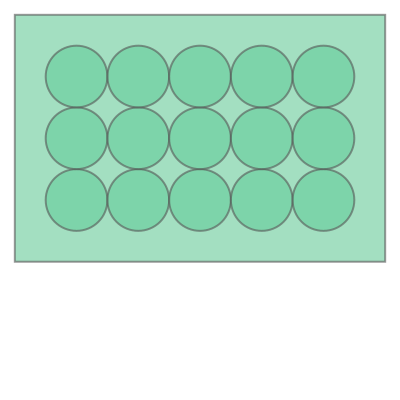

In [4]:
filler = PolygonFiller(container, radius)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
GeometryCollection([container, *circles])

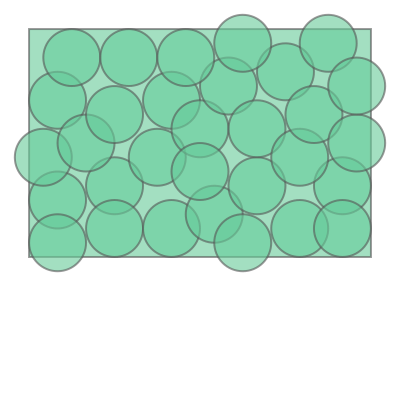

In [5]:
filler = PolygonFiller(container, radius, intersection_threshold=40, shots=5)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
GeometryCollection([container, *circles])

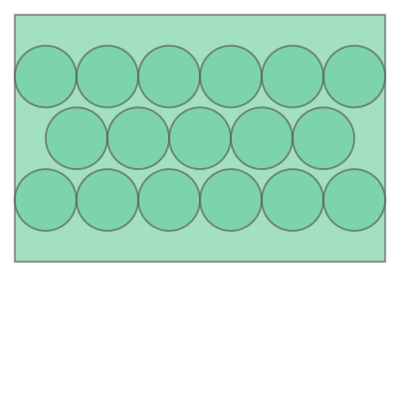

In [6]:
filler = PolygonFillerBeeInitialization(container, radius)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
GeometryCollection([container, *circles])

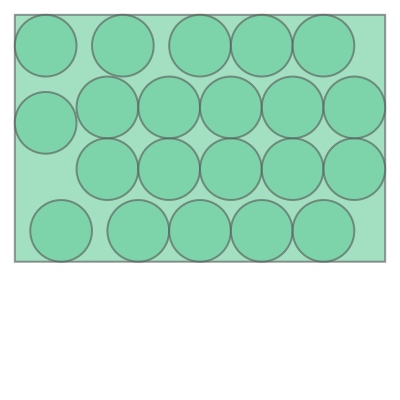

In [7]:
filler = PolygonFillerBeeStrict(container, radius, intersection_threshold=40)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
GeometryCollection([container, *circles])

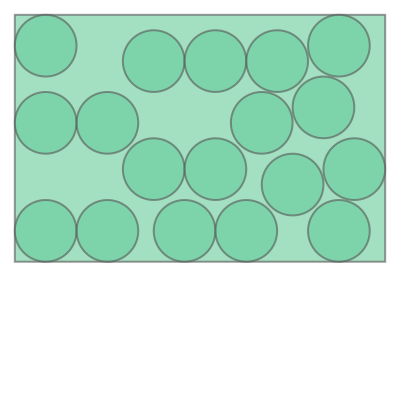

In [8]:
filler = PolygonFillerStrict(container, radius, intersection_threshold=40)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
GeometryCollection([container, *circles])

# Rectangular Container - Random shaped items

In [2]:
def generate_random_shape(min_value, max_value):
    while True:
        poly = Polygon(np.random.uniform(min_value, max_value, (np.random.randint(3, 6), 2)))
        if poly.is_valid:
            return poly

In [4]:
# shapes = [generate_random_shape(0, 1) for _ in range(60)]

In [8]:
with open('../shapes/random_polygons.json', 'r') as f:
    shapes = json.load(f)
    shapes = [shape(s) for s in shapes]

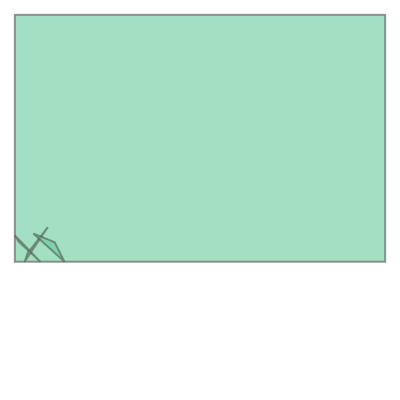

In [11]:
GeometryCollection([container, *shapes[:3]])

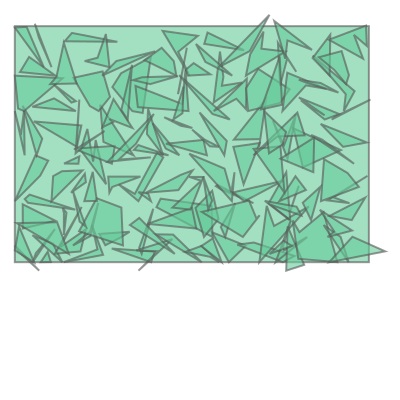

In [12]:
packer = IrregularPacker(container, shapes, n_rotations=1)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [13]:
len(df)

124

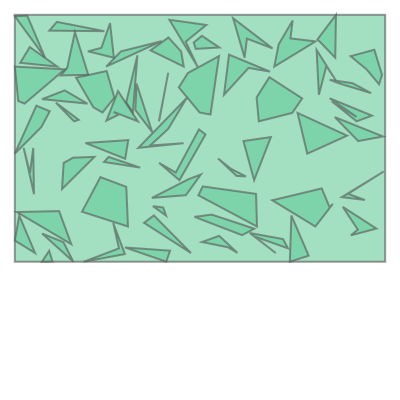

In [45]:
packer = IrregularPackerStrict(container, shapes, n_rotations=1)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [46]:
len(df)

56

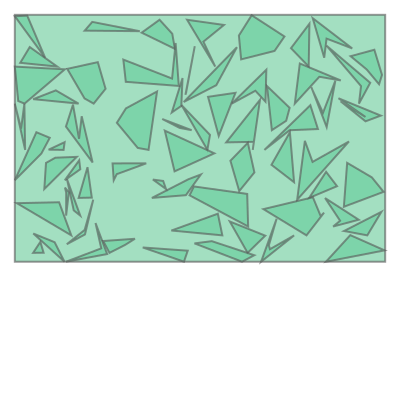

In [53]:
packer = IrregularPackerStrict(container, shapes, n_neighbors=10, n_rotations=1)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [54]:
len(df)

62

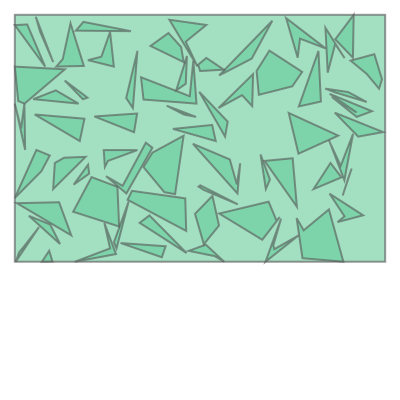

In [47]:
packer = IrregularPackerStrict(container, shapes, step_portion=4, n_rotations=1)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [48]:
len(df)

61

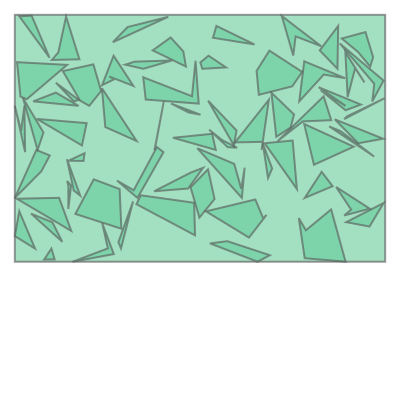

In [49]:
packer = IrregularPackerStrict(container, shapes, step_portion=8, n_rotations=1)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [50]:
len(df)

61

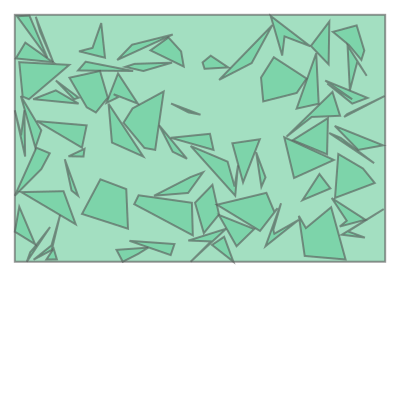

In [51]:
packer = IrregularPackerStrict(container, shapes, step_portion=8, queue_length=10, n_rotations=1)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [52]:
len(df)

63

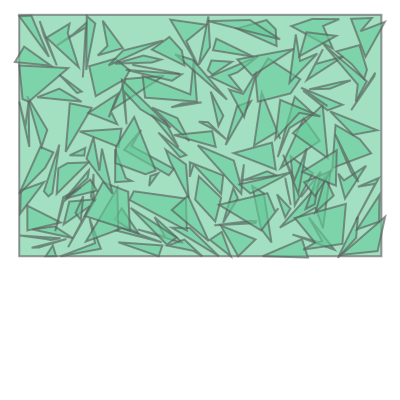

In [7]:
packer = IrregularPacker(container, shapes)
df = packer.pack()
GeometryCollection([container, *df['item']])

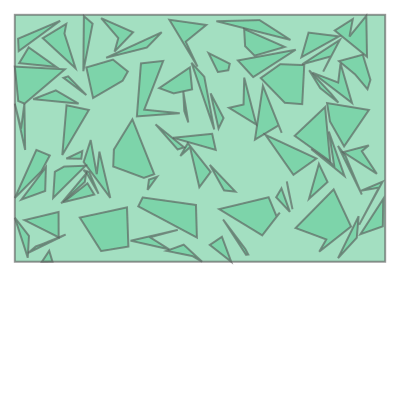

In [8]:
packer = IrregularPackerStrict(container, shapes)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [9]:
len(df)

69

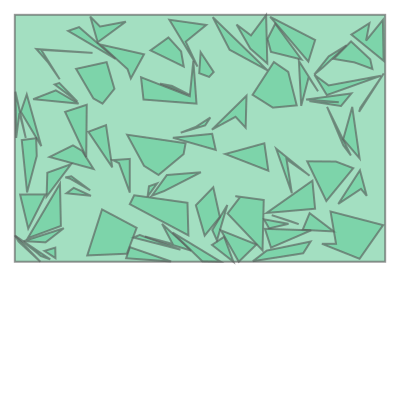

In [11]:
packer = IrregularPackerStrict(container, shapes, step_portion=8, queue_length=10)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [12]:
len(df)

70

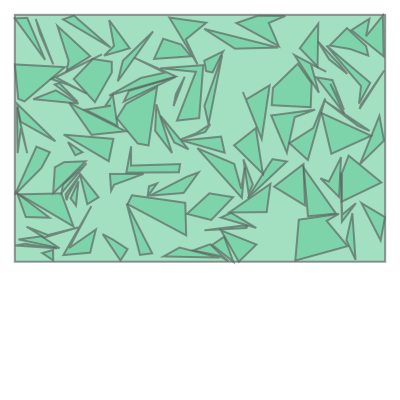

In [13]:
packer = IrregularPackerStrict(container, shapes, n_neighbors=10, step_portion=8, queue_length=10)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [14]:
len(df)

87

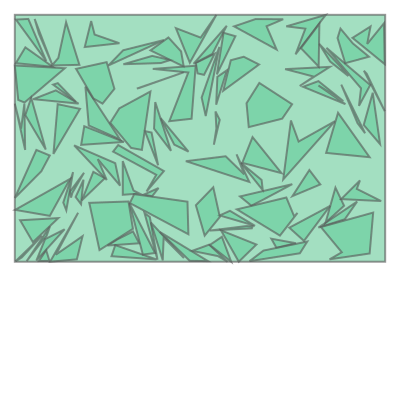

In [15]:
packer = IrregularPackerStrict(container, shapes, n_neighbors=10, step_portion=16, queue_length=20)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [16]:
len(df)

89

# Irregular container - Random Shaped Items

In [3]:
while True:
    container = Polygon(np.random.uniform(-2, 2, (np.random.randint(6, 10), 2)))
    if container.is_valid:
        break

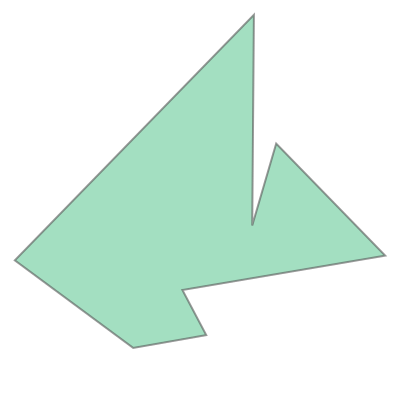

In [4]:
container

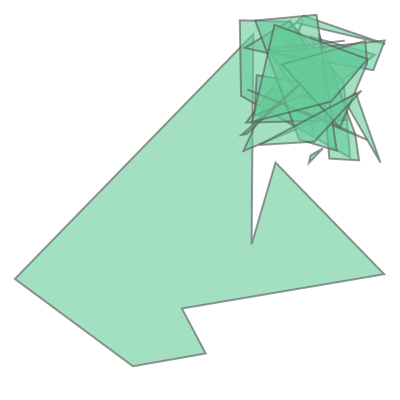

In [5]:
shapes = [generate_random_shape(0, 1) for _ in range(20)]
GeometryCollection([container, *shapes])

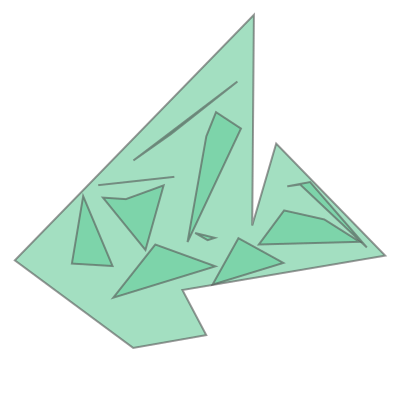

In [6]:
packer = IrregularPackerStrict(container, shapes)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [7]:
len(df), packer.score()

(10, 1.451727549148909)

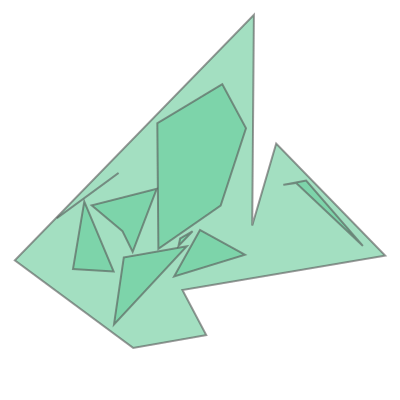

In [8]:
packer = IrregularPackerStrict(container, shapes, n_neighbors=10, step_portion=8, queue_length=10)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [9]:
len(df), packer.score()

(8, 1.3488266447427057)

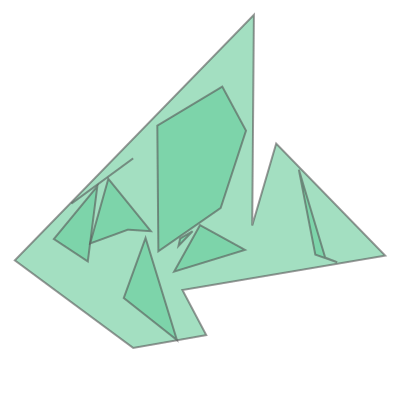

In [10]:
packer = IrregularPackerStrict(container, shapes, n_neighbors=10, step_portion=16, queue_length=20)
df = packer.pack()
GeometryCollection([container, *df['item']])

In [11]:
len(df), packer.score()

(8, 1.3488266447427057)